In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
import scipy.stats as stats
import sklearn
import os

In [8]:
data_raw = pd.read_csv('./cardio_train.csv', sep = ';')

In [9]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
# id 컬럼 삭제
data_raw.drop("id", axis=1, inplace=True)

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [13]:
# 중복 필드 개수 확인
print("There is {} duplicated values in data frame.".format(data_raw.duplicated().sum()))

There is 24 duplicated values in data frame.


In [21]:
# 중복 필드 데이터 확인
duplicated = data_raw[data_raw.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', 'gender', 'height'], ascending = False)

duplicated.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0
40301,21943,1,165,65.0,120,80,1,1,0,0,1,1
52552,21943,1,165,65.0,120,80,1,1,0,0,1,1
8190,21778,1,160,58.0,120,80,1,1,0,0,1,0
65622,21778,1,160,58.0,120,80,1,1,0,0,1,0
21871,21280,1,165,65.0,120,80,1,1,0,0,1,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0


In [22]:
# 중복 값은 지워야한다. 모델이 학습하는데 효율적이기 않기 때문이다.
# 그러므로 중복 값을 삭제한다.
data_raw.drop_duplicates(inplace=True)

In [23]:
print("There is {} duplicated values in data frame.".format(data_raw.duplicated().sum()))

There is 0 duplicated values in data frame.


In [25]:
# 결측값 확인
print("There is {} missing values in data frame.".format(data_raw.isnull().sum().sum()))

There is 0 missing values in data frame.


In [26]:
# 결측값 재확인
data_raw.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [27]:
# 파이썬도 얉은 복사, 깊은 복사가 존재한다.
# 얕은복사는 껍데기만 복사하여 내용은 동일한 객체
# 깊은 복사는 복햅겍체 복사 + 그 내용도 재귀적으로 복사

# x = deepcopy(data_raw)
x = data_raw.copy(deep=True)

# 요약 통계량 확인하기
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
'''
mean = 평균값
std = 표준편차

'''
s_list = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# 표준화 함수 만들기
def standartiztion(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column] - x_std[column].mean())/x_std[column].std()
    return x_std

x_std = standartiztion(x)
x_std.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0
5,0.990952,1,-1.626939,-0.500689,-0.057262,-0.088254,2,2,0,0,0,0
6,1.071605,1,-0.896231,1.305217,0.007658,-0.088254,3,1,0,0,1,0
7,1.262496,2,1.661245,1.444133,0.007658,-0.035205,3,3,0,0,1,1
8,-0.729905,1,-0.774447,-0.222857,-0.122181,-0.141303,1,1,0,0,1,0
9,0.147951,1,-0.043739,-0.431231,-0.122181,-0.194352,1,1,0,0,0,0


In [31]:
# 멀티 박스 그래프를 사용하기 위한 변수 선언 및 초기화
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name ="value", col_level=None)
x_melted

,cardio,features,value
0,0,age,-0.436071
1,1,age,0.307635
2,1,age,-0.248017
3,1,age,-0.748143
4,0,age,-0.808532
...,...,...,...
349875,0,ap_lo,-0.088254
349876,1,ap_lo,-0.035205
349877,1,ap_lo,-0.035205
349878,1,ap_lo,-0.088254


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

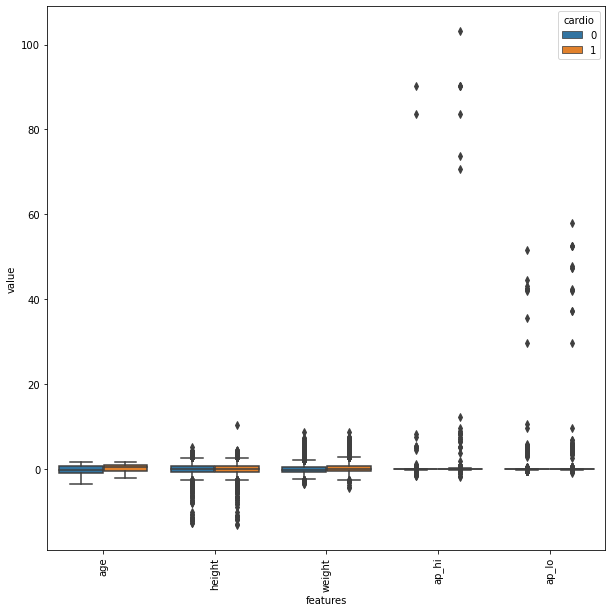

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

In [37]:
# 전체적인 데이터 집합에는 몇 가지 특이한 값이점이 있지만, ap_hi(수축기 혈압), ap_lo(이완기 혈압) 에는 특이 값이 있음을 확인
# 그러므로 ap_hi, ap_lo의 범위를 계산해서 대체해야함

ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound", "upper_bound"])
for each in ap_list:
    Q1 = x[each].quantile(0.25) #quantile 백분위 수 구하기
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [53]:
# 범위 값을 벗어나는 이상 값 확인
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
print(x_outliers.count())
x_outliers["cardio"].value_counts()

age            2413
gender         2413
height         2413
weight         2413
ap_hi          2413
ap_lo          2413
cholesterol    2413
gluc           2413
smoke          2413
alco           2413
active         2413
cardio         2413
dtype: int64


1    2025
0     388
Name: cardio, dtype: int64

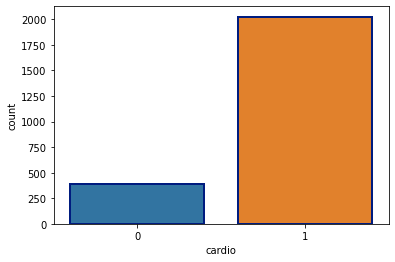

In [57]:
# 심혈관 질환은 ap_hi와 ap_lo 특이치 데이터의 83%에 존재.
# ap_hi와 ap_lo는 고혈압을 상징하기 때문에 높은 발병률이 실제와 일치한다.
# 이런 이유로, 학적으로 불가능한 데이터만 삭제하기로 결정.
# 그리고  충분한 데이터(700개)를 가지고 있기 때문에 약간의 데이터 삭제.

sns.countplot(x='cardio', data=x_outliers, linewidth=2, edgecolor=sns.color_palette('dark', 1))

In [65]:
# Blood Pressure Categories 에 맞지 않은 이상치 제거

out_filter =((x['ap_hi'] > 250) | (x['ap_lo'] > 200))
print('There is {} outlier.'.format(x[out_filter]['cardio'].count()))

There is 993 outlier.


In [66]:
x = x[~out_filter]

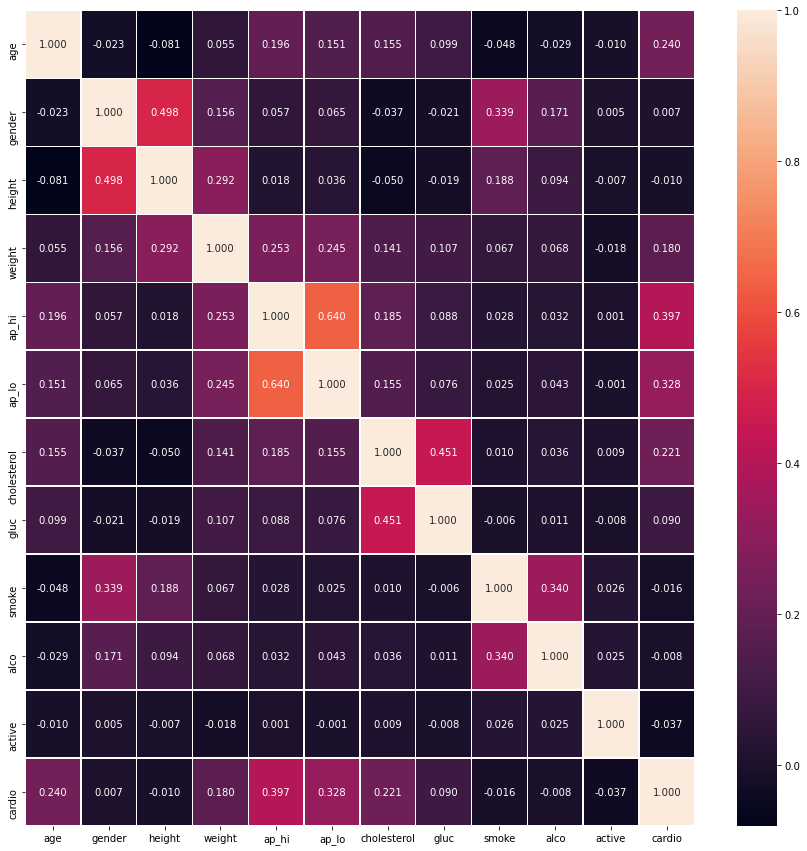

In [69]:
# 히트맵 그리기
corr = x.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.3f', linewidths=0.5, ax=ax)

# 히트맵을 통해서 나이, ap_hi, ap_lo, 콜레스테롤은 심혈관 질환과 관계가 있는 것을 알 수 있었다
# 또한, 포도당과 콜레스테롤로 상관 관계가 있어 보인다

In [70]:
# 키와 몸무게는 상관없어 보이지만 해당 데이터를 가지고 BMI 모델을 만들어 활용할 수 있다.

# BMI 계산기 만들기
def bim_calc(w, h):
    return w/(h**2)

In [71]:
x['bmi'] = x['weight']/(x['height']/100)**2

In [72]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [74]:
# 환자의 성별 탐지
a = x[x['gender']==1]['height'].mean()
b = x[x['gender']==2]['height'].mean()

if a > b:
    gender = 'male'
    gender2 = 'female'
else:
    gender = 'female'
    gender2 = 'male'

print('Gender:1 is' + gender + " & Gender:2 is " + gender2)

Gender:1 isfemale & Gender:2 is male


In [75]:
# 특히 65세 이후 흡연, 고혈압, 고콜레스테롤과 같이 여성은 남성과 심장질환에 대한 위험인자가 많음
# 그러므로 우리는 그것들을 1과 2로 분류해서는 안 된다. 왜냐하면 2는 항상 숫자적으로 1보다 크기 때문이다. 
# 그 모델은 그것을 고려했을 것이고 병에 걸린 남성들에게 더 큰 비율을 줄 것이다.
# 카테고리컬 코드를 핫 인코딩으로 변경하지 않은 이유는 카테고리컬 코드가 계층적 크기를 표현하기 때문

x['gender'] = x['gender'] % 2

In [76]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,0,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,0,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

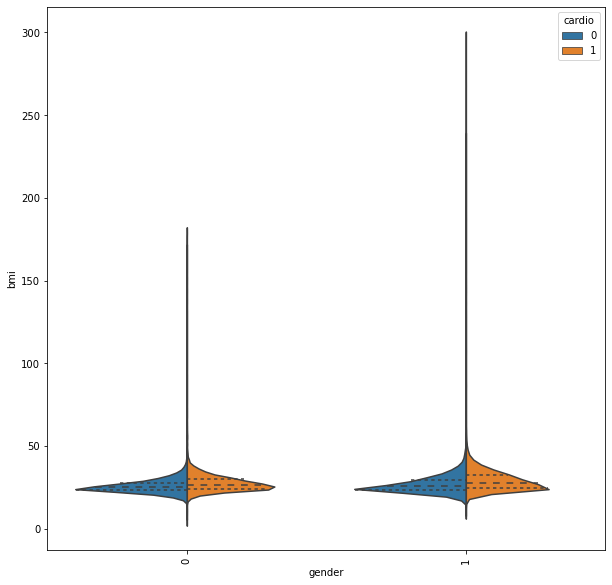

In [80]:
from sklearn.preprocessing import StandardScaler
x_std = standartiztion(x)

data = pd.melt(x_std, id_vars='cardio', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='gender', y='bmi', hue='cardio', data=x, split=True, inner='quart')
plt.xticks(rotation=90)

# 바이올린 플롯을 해석하면 환자의 bmi 분포의 중위수와 사분위수가 비환자보다 약간 높다.

In [81]:
# 트레인모델, 테스트 모델 나누기
y = x['cardio']

In [82]:
y.shape

(68983,)

In [83]:
x.drop('cardio', axis=1, inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,18393,0,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,17623,0,169,82.0,150,100,1,1,0,0,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,23.011177


In [85]:
# 본견적인 Train, Test 데이터셋 분할하기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # random_state = 난수의 초기값 설정

In [86]:
x_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
55029,19016,1,165,65.0,150,100,1,1,0,0,1,23.875115
52040,22766,0,168,70.0,120,80,3,1,0,0,1,24.801587
33093,22572,1,163,73.0,160,100,1,1,0,0,0,27.475629
13999,17532,1,161,56.0,110,70,1,1,0,0,0,21.604105
59211,19677,0,174,80.0,150,80,1,1,0,0,1,26.423570


In [87]:
x_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
63680,22536,0,159,61.0,110,70,1,2,1,0,1,24.128792
41655,21750,0,169,72.0,120,80,1,1,0,0,1,25.209201
25334,21909,1,166,69.0,120,80,1,1,0,0,1,25.039919
40998,16750,0,162,60.0,120,70,1,1,0,0,0,22.862369
32676,18077,1,157,60.0,130,80,3,3,0,0,0,24.341758


In [88]:
# 데이터 정규화

from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

In [89]:
# 모델 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()


models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [90]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.718200
KNN,0.713054
Naive bayes,0.630862
Decision tree,0.628905
SVM,0.505907


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

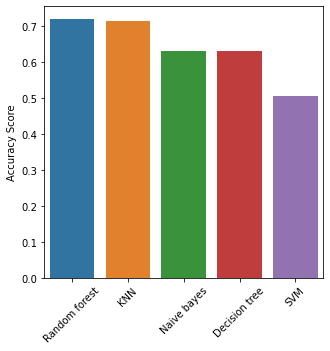

In [91]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
''''''plt.xticks(rotation=45)

In [92]:
'''
K-fold Cross Validation을 통해 교차검증
그리고 나서 우리는 이 결과들의 평균을 실제 결과로 선택한다.
결국 K 결과의 표준편차를 취함으로써 데이터가 일관성이 있는지 살펴볼 수 있다.
'''
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [94]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.714184630628871
Random Forest Standart Deviation:  0.006193164575894854
KNN Average accuracy:  0.7134959917372659
KNN Standart Deviation:  0.006571724105971957


In [95]:
# 랜덤 포레스트의 n_estimators 하이퍼 파라미터를 찾기위해 Grid Search 
# n_estimators = 생성할 tree의 개수
# max_features =

from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}
ran_cv = GridSearchCV(ran, grid, cv=3)
ran_cv.fit(x_train,y_train)

print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 120}
Best score: 0.7158336298807764


In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter n_estimators: {'C': 78, 'penalty': 'l1'}
Best score: 0.7238428537523363


In [97]:
# 모델 평가
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

Test accuracy:  0.7267521925056172


In [98]:
# 분료 모델 성능 평가 지표 Confusion Matrix
# Confusion Matrix = 트레이닝을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
# Actual value = 실제값, predictive values = 예측값

y_true = y_test
y_pred = logreg_best.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

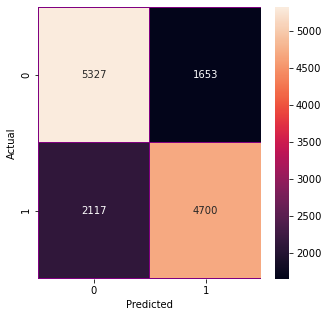

In [100]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score

In [101]:
# F1 Score
# >> Precision과 Recall의 조화평균
# 데이터가 불균형할 때

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

,Precision,Recall,F1 Score
Results,0.739808,0.689453,0.713743


In [102]:
# ANN Aproach

x.shape

(68983, 12)

In [103]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=12, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [104]:
optimizer = RMSprop(learning_rate=0.002)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [105]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',
    factor=0.1,       
    patience=50,      
    verbose=1,        
    mode="auto",
    min_delta=0.0001, 
    cooldown=0,       
    min_lr=0.00001    
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train.values,
                    batch_size=1024, epochs=1500,
                    verbose=0,validation_data=(x_test,y_test.values),
                    callbacks=[learning_rate_reduction, es],
                    shuffle=True)

model.evaluate(x_test, y_test.values, verbose=2)

432/432 - 0s - loss: 0.5761 - accuracy: 0.7042


[0.5761169791221619, 0.7042110562324524]

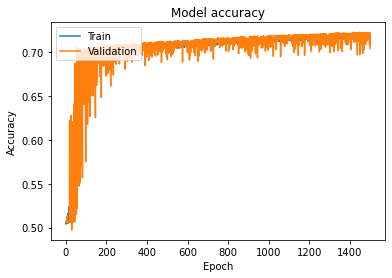

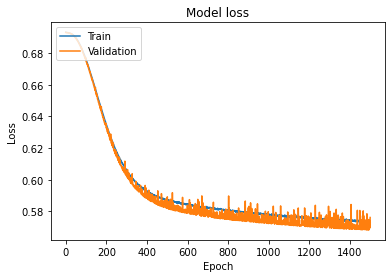

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()